In [16]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(3, 2)

# Grover Search algorithm for 2 qubits and 1 control bit

# Preparation using superposition
circuit.h(0)
circuit.h(1)
circuit.x(2)
circuit.barrier(0)
circuit.barrier(1)
circuit.h(2)
circuit.barrier(0)
circuit.barrier(1)
circuit.barrier(2)

# Function Uw
circuit.x(0)
circuit.ccx(0, 1, 2)
circuit.x(0)
circuit.barrier(1)
circuit.barrier(2)
circuit.barrier(0)
circuit.barrier(1)
circuit.barrier(2)

# Function Us
circuit.h(0)
circuit.h(1)
circuit.x(0)
circuit.x(1)
circuit.ccx(0, 1, 2)
circuit.x(0)
circuit.x(1)
circuit.barrier(2)
circuit.h(0)
circuit.h(1)
circuit.barrier(2)
circuit.barrier(0)
circuit.barrier(1)
circuit.barrier(2)

# Measure
circuit.measure([0, 1], [0, 1])

# Draw the circuit
circuit.draw()

In [2]:
from qiskit import IBMQ

# IBM-Q Account credentials initialization
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
# List all backends available with us
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
        
    print(f'{backend.name()} ({qubit_count}) : {backend.status().pending_jobs} queued job(s).')

ibmq_qasm_simulator (simulated) : 0 queued job(s).
ibmqx2 (5) : 90 queued job(s).
ibmq_16_melbourne (14) : 10 queued job(s).
ibmq_vigo (5) : 4 queued job(s).
ibmq_ourense (5) : 9 queued job(s).
ibmq_london (5) : 27 queued job(s).
ibmq_burlington (5) : 5 queued job(s).
ibmq_essex (5) : 4 queued job(s).


In [12]:
from qiskit.tools.monitor import job_monitor

# Executing a job on the IBM-Q quantum computer
backend = provider.get_backend('ibmq_ourense')
job = q.execute(circuit, backend = backend, shots = 1024)
job_monitor(job)

Job Status: job has successfully run


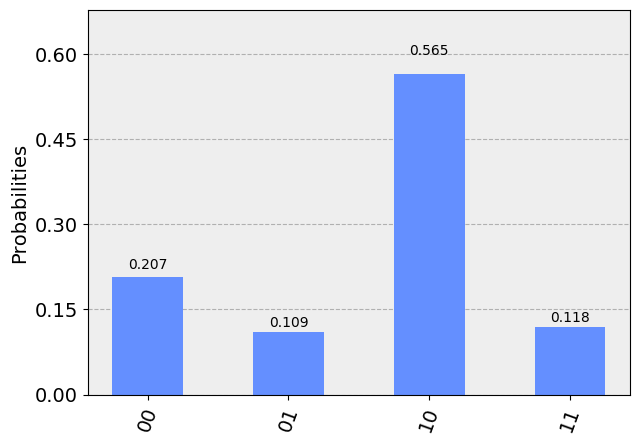

In [13]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use('default')

# Display histogram for results
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [14]:
# Trying on ibmq-qasm-simulator
sim_backend = provider.get_backend('ibmq_qasm_simulator')
sim_job = q.execute(circuit, backend = sim_backend, shots = 1024)
job_monitor(sim_job)

Job Status: job has successfully run


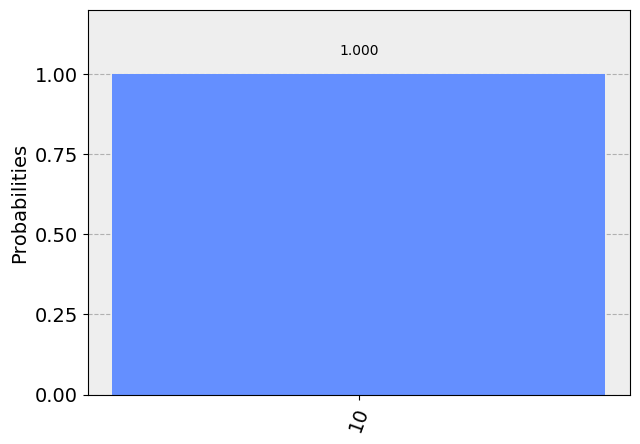

In [15]:
# Results of the ibmq-qasm-simulator
sim_result = sim_job.result()
sim_counts = sim_result.get_counts(circuit)

plot_histogram([sim_counts])